In [1]:
from models import CVAE
from models import modelTrainer
import scanpy as sc
from torchsummary import summary

In [2]:
adata = sc.read("./kang_count.h5ad")
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.filter_genes_dispersion(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=1000)
adata_fil = adata[:, adata.var['highly_variable']]
n_conditions = adata.obs["condition"].unique().shape[0]

In [3]:
sc.pp.neighbors(adata_fil)
sc.tl.umap(adata_fil)


         Falling back to preprocessing with `sc.pp.pca` and default params.


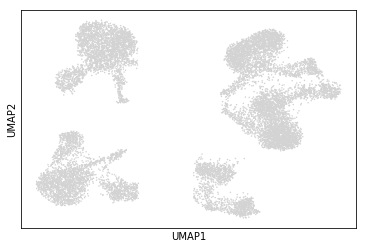

In [4]:
sc.pl.umap(adata_fil)

In [6]:
model = CVAE(adata_fil.n_vars, n_conditions,
             encoder_layer_sizes=[256], decoder_layer_sizes=[256], latent_dim=10, alpha=0.0001)

In [7]:
trainer = modelTrainer(model, adata_fil)

In [8]:
trainer.train(10,124)

Epoch 00/10 Batch 0000/93, Loss:  245.3828, rec_loss:  245.3826, KL_loss:    0.0002
Epoch 00/10 Batch 0093/93, Loss:   66.0680, rec_loss:   66.0642, KL_loss:    0.0038
Epoch 01/10 Batch 0000/93, Loss:   57.7827, rec_loss:   57.7788, KL_loss:    0.0039
Epoch 01/10 Batch 0093/93, Loss:   70.2772, rec_loss:   70.2722, KL_loss:    0.0050
Epoch 02/10 Batch 0000/93, Loss:   49.6230, rec_loss:   49.6178, KL_loss:    0.0052
Epoch 02/10 Batch 0093/93, Loss:   54.0771, rec_loss:   54.0709, KL_loss:    0.0062
Epoch 03/10 Batch 0000/93, Loss:   51.1612, rec_loss:   51.1556, KL_loss:    0.0057
Epoch 03/10 Batch 0093/93, Loss:   58.1238, rec_loss:   58.1173, KL_loss:    0.0065
Epoch 04/10 Batch 0000/93, Loss:   48.7518, rec_loss:   48.7455, KL_loss:    0.0063
Epoch 04/10 Batch 0093/93, Loss:   57.4626, rec_loss:   57.4561, KL_loss:    0.0065
Epoch 05/10 Batch 0000/93, Loss:   47.9612, rec_loss:   47.9546, KL_loss:    0.0066
Epoch 05/10 Batch 0093/93, Loss:   57.7438, rec_loss:   57.7364, KL_loss:   